# Исследовательский анализ данных (фильмы)

*Импорт необходимых библиотек*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Посмотрим на данные, которые предоставляет нам *kaggle*

In [2]:
df = pd.read_csv("../input/netflix-tv-shows-and-movies/credits.csv")
df.head(7) # отображение первых 7 строк

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR


In [3]:
dft = pd.read_csv("../input/netflix-tv-shows-and-movies/titles.csv")
dft.head(7) # отображение первых 7 строк

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5


Убираем "лишние столбцы" (для удобства восприятия)

In [4]:
dft = dft.drop(['id', 'imdb_id', 'type', 'description', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], axis = 1)
dft.head(7)

,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
0,Five Came Back: The Reference Films,1945,TV-MA,48,['documentation'],['US'],1.0,NaN
1,Taxi Driver,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3
2,Monty Python and the Holy Grail,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2
3,Life of Brian,1979,R,94,['comedy'],['GB'],NaN,8.0
4,The Exorcist,1973,R,133,['horror'],['US'],NaN,8.1
5,Monty Python's Flying Circus,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8
6,Dirty Harry,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,7.7


In [5]:
# отбрасываем "пропущенные значения"
dft = dft.dropna()
dft.head(10)

,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
5,Monty Python's Flying Circus,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8
29,Monty Python's Fliegender Zirkus,1972,TV-MA,43,['comedy'],[],1.0,8.1
47,Seinfeld,1989,TV-PG,24,['comedy'],['US'],9.0,8.9
55,Knight Rider,1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9
57,Thomas & Friends,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5
60,Saved by the Bell,1989,TV-G,23,"['comedy', 'romance', 'family']",['US'],5.0,7.1
64,Wheel of Fortune,1983,TV-G,26,['family'],['US'],39.0,6.7
65,Major Dad,1989,TV-PG,24,"['comedy', 'family']",['US'],4.0,6.4
66,Fireman Sam,1987,TV-Y,10,"['comedy', 'animation', 'family', 'crime', 'eu...",['GB'],13.0,6.1
67,Danger Mouse,1981,TV-Y,15,"['comedy', 'family', 'scifi', 'animation', 'eu...",['GB'],10.0,7.4


In [6]:
# Общее количество строк и столбцов
dft.shape

(1670, 8)

In [7]:
# Строки, содержащие дубликаты данных
Duplicate_rows = dft[dft.duplicated()] 
print("Количество повторяющихся строк: ", Duplicate_rows.shape)

Количество повторяющихся строк:  (0, 8)


Чтобы не вышло неприятных курьезов нам необходимо проверить тип данных (на случай есть данные которые мы предполагаем численного типа, не являются таковыми)

In [8]:
# Проверка типа данных
dft.dtypes

title                    object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_score              float64
dtype: object

**Перейдем к исследованию данных**

Посмотрим на жанры фильмов, их длительность, страну выпуска и количество сезонов.

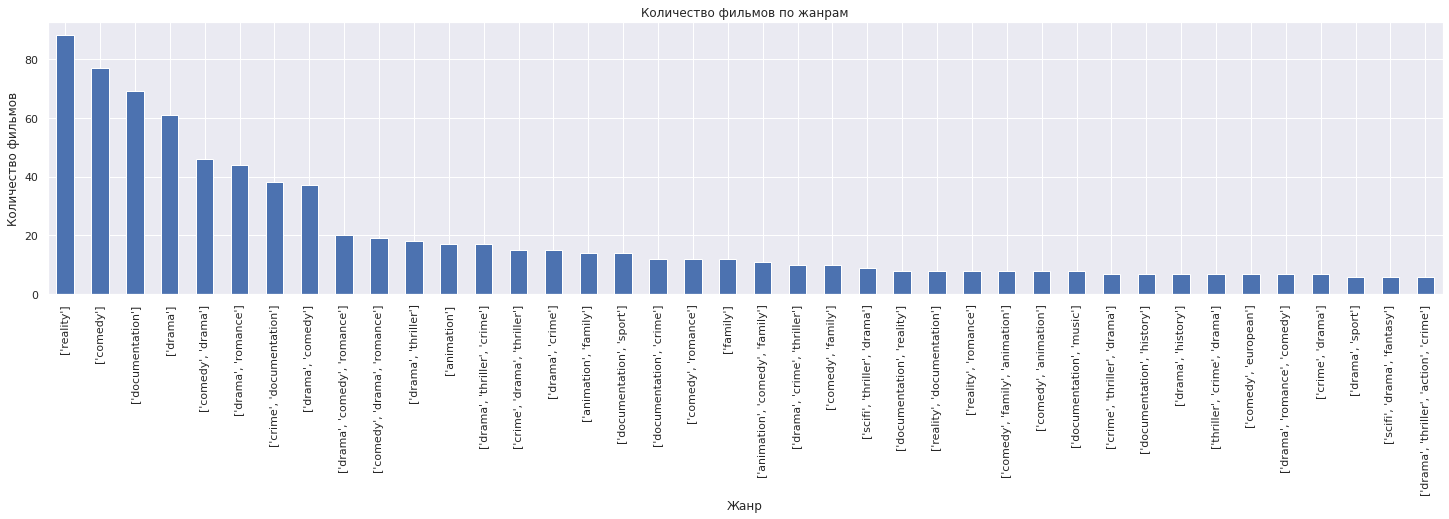

In [9]:
dft.genres.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title('Количество фильмов по жанрам') 
plt.ylabel('Количество фильмов') 
plt.xlabel('Жанр');

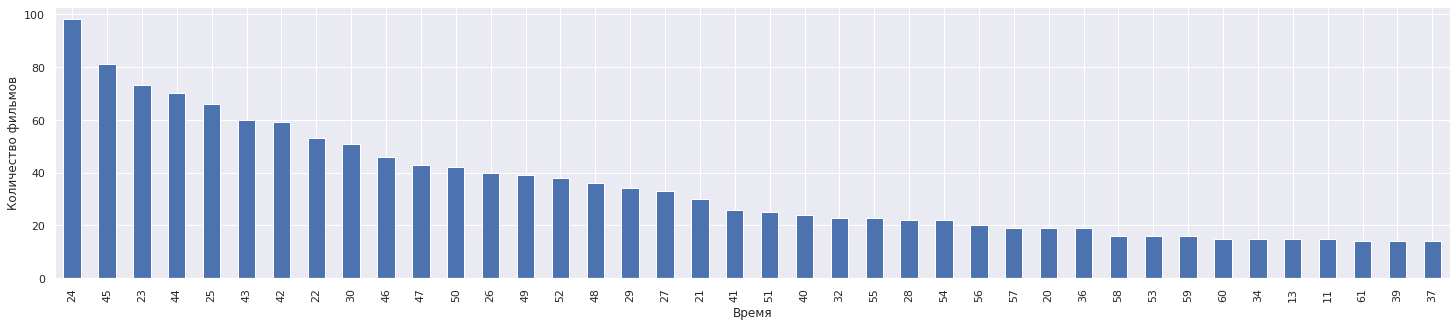

In [10]:
dft.runtime.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.ylabel('Количество фильмов') 
plt.xlabel('Время');

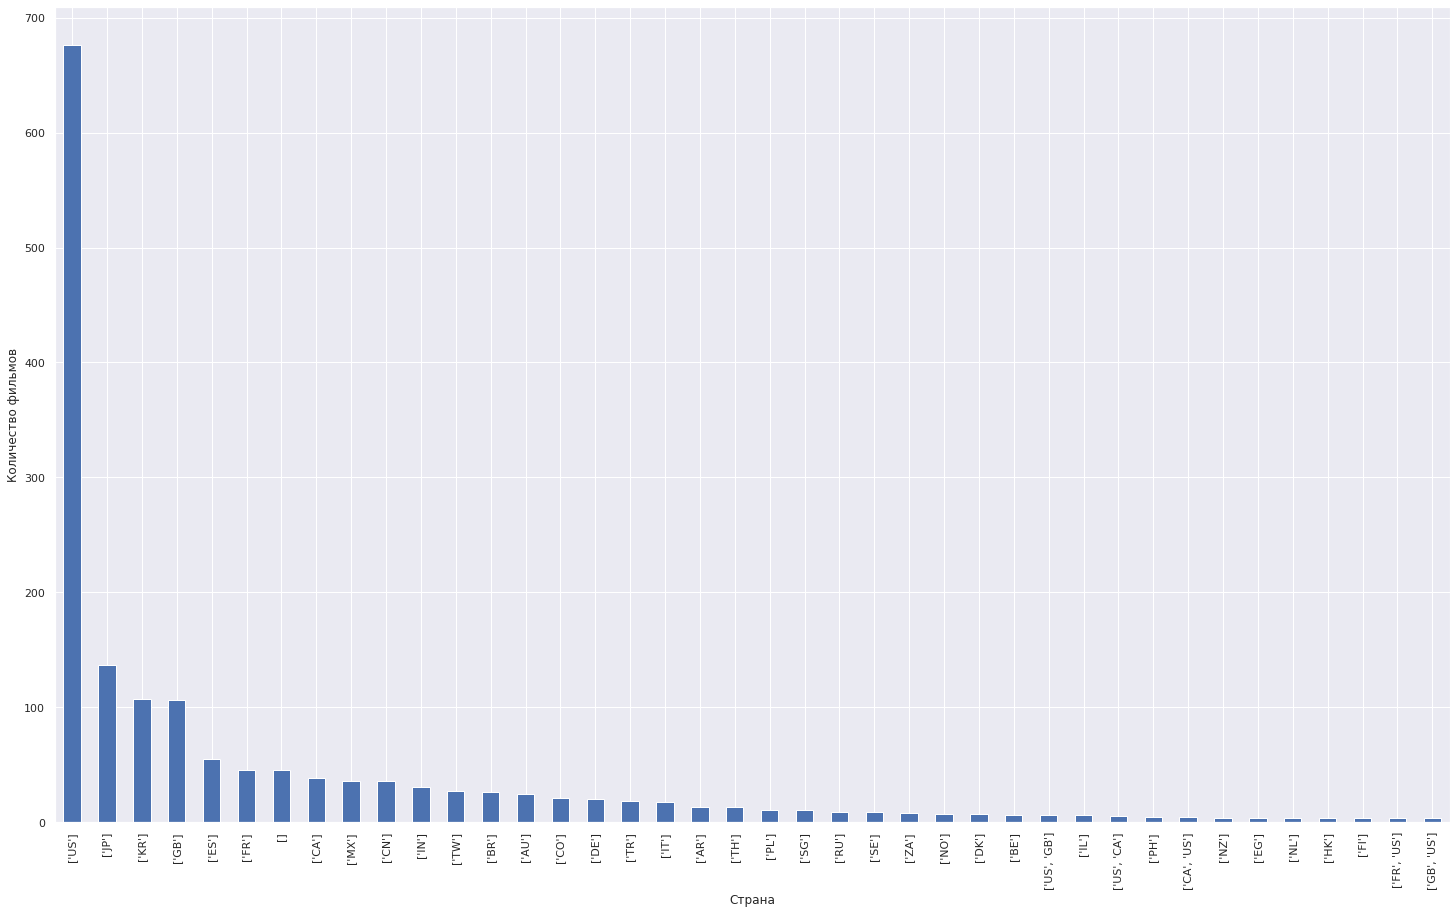

In [11]:
dft.production_countries.value_counts().nlargest(40).plot(kind='bar', figsize=(25,15))
plt.ylabel('Количество фильмов') 
plt.xlabel('Страна');

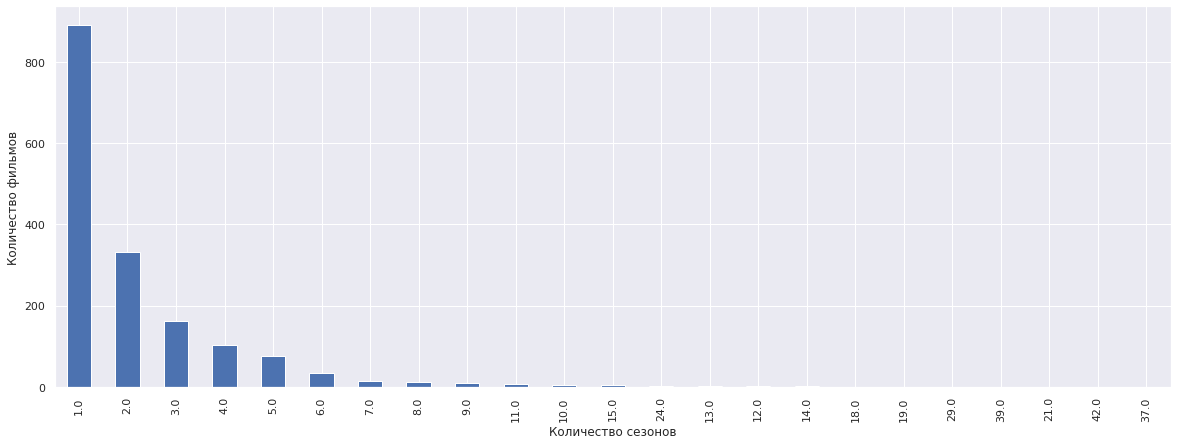

In [12]:
dft.seasons.value_counts().nlargest(40).plot(kind='bar', figsize=(20,7))
plt.ylabel('Количество фильмов') 
plt.xlabel('Количество сезонов');

Посмотрим на взаимосвязь между годом выпуска, продолжительности, количества сезонов и рейтингом фильмов.

,release_year,runtime,seasons,imdb_score
release_year,1.000000,0.134100,-0.539838,-0.165958
runtime,0.134100,1.000000,-0.129624,0.220120
seasons,-0.539838,-0.129624,1.000000,0.112663
imdb_score,-0.165958,0.220120,0.112663,1.000000


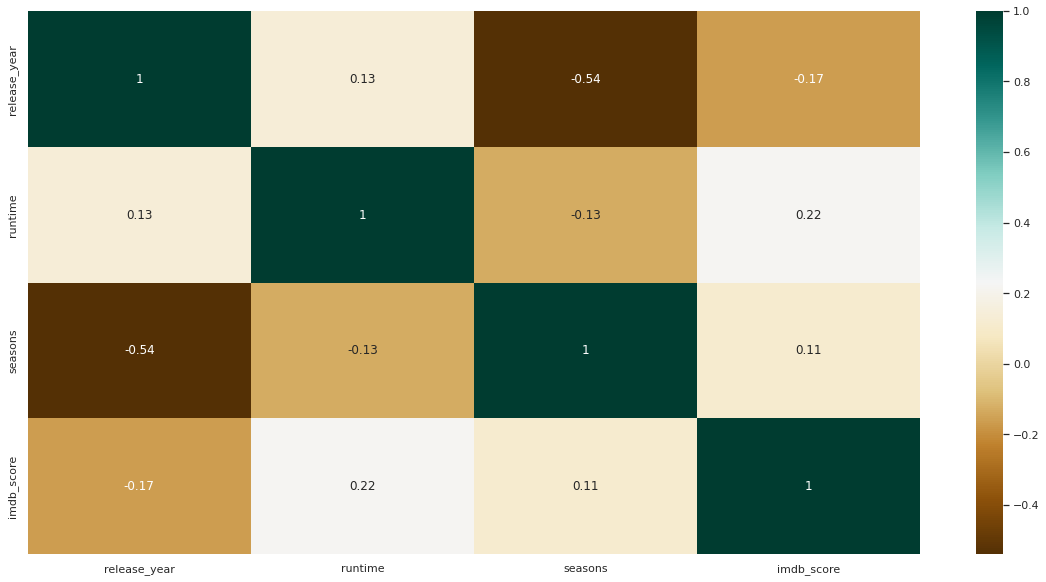

In [13]:
 plt.figure(figsize=(20,10)) 
c= dft.corr() 
sns.heatmap(c,cmap='BrBG',annot=True) 
c

*Проведем анализ тепловой карты.* Мы видим несколько зависимостей, рассмотрим их:

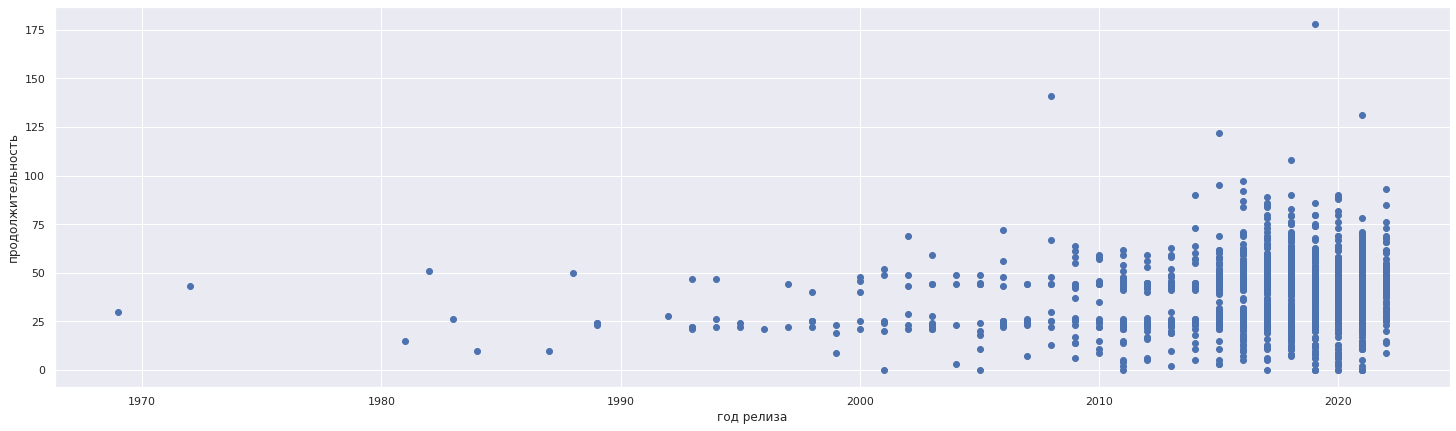

In [14]:
# Пронаблюдаем связь год релиза - длительность фильма
fig, ax = plt.subplots(figsize=(25,7)) 
ax.scatter(dft['release_year'], dft['runtime']) 
ax.set_xlabel('год релиза') 
ax.set_ylabel ('продолжительность') 
plt.show()

На диаграмме видно, что в момент зарождения кинематографии фильмы длились не более часа. Также мы можем проследить количество вышедших за год фильмов, и вплоть до 1990х мы можем говорить о единичных выпусках. Однако в процессе развития кинематографии мы видим как увеличении количества продукции, так их продолжительности. Уже после 2010 года можно найти фильмы, которые длятся буквально пару минут так и те, что придется смотреть несколько часов.

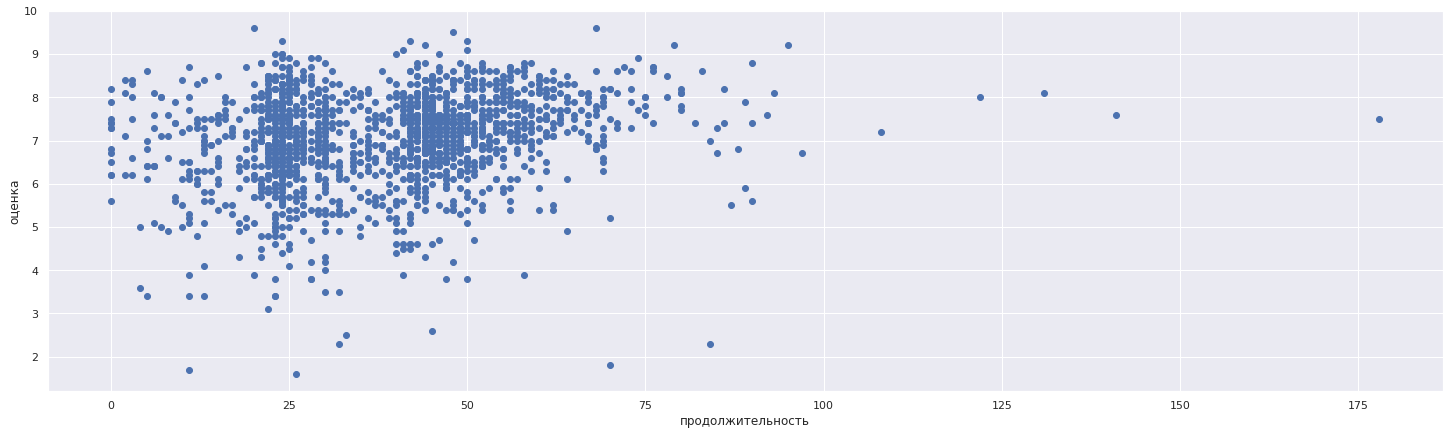

In [15]:
# Пронаблюдаем связь оценка - длительность фильма
fig, ax = plt.subplots(figsize=(25,7)) 
ax.scatter(dft['runtime'], dft['imdb_score']) 
ax.set_xlabel('продолжительность') 
ax.set_ylabel ('оценка') 
plt.show()

Фильмы продолжительностью более 100 минут имеют достаточно высокую оценку. Однако есть множество фильмов до 60 минут которые имеют самый разнообразный рейтинг. Поэтому однозначно утверждать, что чем больше, тем лучше мы не можем.

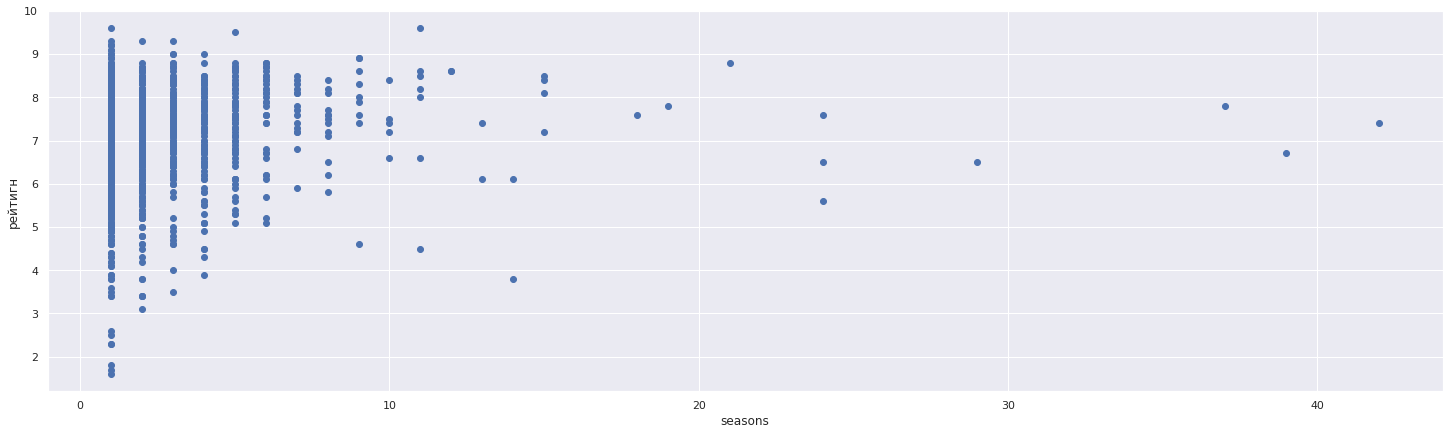

In [16]:
# Пронаблюдаем связь оценка фильма - количество сезонов
fig, ax = plt.subplots(figsize=(25,7)) 
ax.scatter(dft['seasons'], dft['imdb_score']) 
ax.set_xlabel('seasons') 
ax.set_ylabel ('рейтигн') 
plt.show()

Мы видим несколько проектов, у которых достаточно высокий рейтинг, но при этом они имеют не более 10 сезонов. Также есть несколько фильмов с рейтингом ниже 5, но количеством сезонов 10-20. Что повлияло на такие результаты? Думаю однозначно  ответить на этот вопрос нельзя, так как кроме данных представленных в таблице есть еще ряд факторов влияющих на выпуск фильмов (например, уход актера из проекта, нехватка финансов и т.д.).
Но, несмотря на «исключения» правила, чем выше рейтинг, тем больше сезонов мы видим 3 фильма с рейтингом ~7 количество сезонов, которых близко к 40!

# После проведенного анализа данных, к сожалению, нельзя точно выразить, отчего зависит длительность фильма, его рейтинг, количество сезонов, год показа и т.д. Однако поисследовав эти данные можно установить некоторые закономерности и аналогии.